# Membuat model prediktif

Mengimpor library Python yang dibutuhkan untuk analisis data, preprocessing, pembuatan model, dan evaluasi.
- `pandas`: Untuk manipulasi dan analisis data (DataFrames).
- `seaborn` dan `matplotlib.pyplot`: Untuk visualisasi data.
- `numpy`: Untuk operasi numerik.
- `sklearn.model_selection.train_test_split`: Untuk membagi data menjadi set pelatihan dan pengujian.
- `sklearn.metrics`: Untuk metrik evaluasi model seperti akurasi, presisi, recall, F1-score, laporan klasifikasi, dan confusion matrix.
- `tensorflow`: Untuk membangun dan melatih model Artificial Neural Network (ANN).

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import tensorflow as tf

Membaca file CSV yang baru saja diunggah (`sepsis_emr_data.csv`) ke dalam DataFrame pandas. DataFrame adalah struktur data tabular yang memudahkan pengelolaan data.

In [2]:
from google.colab import files

# Mengunggah file dari sistem lokal
uploaded = files.upload()

Saving sepsis_emr_data.csv to sepsis_emr_data.csv


## Data understanding

Membaca file CSV yang baru saja diunggah (`sepsis_emr_data.csv`) ke dalam DataFrame pandas. DataFrame adalah struktur data tabular yang memudahkan pengelolaan data.

In [3]:
# Membaca file CSV yang diunggah ke dalam DataFrame pandas
df = pd.read_csv('/content/sepsis_emr_data.csv')

Menampilkan lima baris pertama dari DataFrame menggunakan metode `.head()`. Ini membantu untuk melihat struktur data, nama kolom, dan tipe data awal.

In [ ]:
# Menampilkan beberapa baris pertama dari DataFrame untuk melihat struktur data
df.head()

,patient_id,heart_rate,respiratory_rate,temperature,wbc_count,lactate_level,age,num_comorbidities,sepsis_risk
0,PID0001,88,17,37.1,7.9,1.1,51,1,0
1,PID0002,115,25,38.6,16.0,3.6,78,3,1
2,PID0003,79,16,36.9,7.1,0.9,42,0,0
3,PID0004,96,20,37.5,10.2,1.6,65,2,0
4,PID0005,122,29,39.2,18.1,4.7,83,4,1


Menghasilkan statistik deskriptif (seperti mean, median, standar deviasi, min, max) untuk kolom-kolom numerik dalam DataFrame menggunakan metode `.describe()`. Ini memberikan gambaran ringkas tentang distribusi data.

In [ ]:
# Menampilkan statistik deskriptif untuk kolom numerik dalam DataFrame
df.describe()

,heart_rate,respiratory_rate,temperature,wbc_count,lactate_level,age,num_comorbidities,sepsis_risk
count,1753.000000,1753.000000,1753.000000,1753.000000,1612.000000,1753.000000,1753.000000,1753.000000
mean,102.389618,21.380491,37.677981,12.153337,2.498325,62.423274,1.938962,0.419852
std,18.910763,5.042129,0.897800,4.239124,1.397458,16.896812,1.264295,0.493675
min,76.000000,14.000000,35.700000,6.100000,0.800000,29.000000,0.000000,0.000000
25%,88.000000,17.000000,36.900000,8.000000,1.200000,48.000000,1.000000,0.000000
50%,99.000000,20.000000,37.500000,11.200000,2.100000,65.000000,2.000000,0.000000
75%,115.000000,26.000000,38.500000,16.100000,3.700000,76.000000,3.000000,1.000000
max,220.000000,31.000000,39.400000,19.600000,5.300000,91.000000,4.000000,1.000000


Menampilkan informasi ringkas tentang DataFrame menggunakan metode `.info()`. Ini mencakup jumlah entri non-null di setiap kolom dan tipe data setiap kolom, yang penting untuk mengidentifikasi nilai yang hilang atau tipe data yang tidak sesuai.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         1753 non-null   object 
 1   heart_rate         1753 non-null   int64  
 2   respiratory_rate   1753 non-null   int64  
 3   temperature        1753 non-null   float64
 4   wbc_count          1753 non-null   float64
 5   lactate_level      1612 non-null   float64
 6   age                1753 non-null   int64  
 7   num_comorbidities  1753 non-null   int64  
 8   sepsis_risk        1753 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 123.4+ KB


## Data preprocessing

Memfilter DataFrame untuk menampilkan baris-baris yang setidaknya memiliki satu nilai yang hilang (`NaN`) menggunakan `.isnull().any(axis=1)`. Ini membantu dalam mengidentifikasi baris yang perlu ditangani selama preprocessing data.

In [4]:
# Menampilkan baris yang memiliki nilai yang hilang (NaN) di kolom manapun
rows_with_missing_values = df[df.isnull().any(axis=1)]

rows_with_missing_values

,patient_id,heart_rate,respiratory_rate,temperature,wbc_count,lactate_level,age,num_comorbidities,sepsis_risk
7,PID0008,92,18,37.2,9.1,NaN,33,0,0
16,PID0017,94,19,37.4,10.5,NaN,57,1,0
29,PID0030,90,18,37.1,8.9,NaN,51,1,0
38,PID0039,82,15,36.8,6.7,NaN,32,0,0
48,PID0049,93,18,37.3,9.7,NaN,55,1,0
...,...,...,...,...,...,...,...,...,...
1707,PID1708,92,18,37.2,9.1,NaN,33,0,0
1716,PID1717,94,19,37.4,10.5,NaN,57,1,0
1729,PID1730,90,18,37.1,8.9,NaN,51,1,0
1738,PID1739,82,15,36.8,6.7,NaN,32,0,0


Menghapus kolom 'patient_id' dari DataFrame menggunakan metode `.drop()` dengan `inplace=True`. Kolom 'patient_id' biasanya merupakan pengenal unik dan tidak relevan untuk pelatihan model prediktif.

In [5]:
# Menghapus kolom 'patient_id' karena tidak relevan untuk pelatihan model
df.drop(columns="patient_id", inplace=True)

Menghapus baris-baris dari DataFrame yang masih mengandung nilai yang hilang setelah potensi penghapusan kolom 'patient_id' menggunakan metode `.dropna()`. Jumlah baris sebelum dan sesudah penghapusan dicetak untuk transparansi.

In [6]:
# Menghapus baris yang memiliki nilai yang hilang (NaN)
df = df.dropna()

# Mencetak jumlah baris sebelum dan sesudah penghapusan missing values
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after dropping missing values: {len(df)}")

# Menampilkan beberapa baris pertama dari DataFrame setelah penghapusan missing values
display(df.head())

Original number of rows: 1612
Number of rows after dropping missing values: 1612


,heart_rate,respiratory_rate,temperature,wbc_count,lactate_level,age,num_comorbidities,sepsis_risk
0,88,17,37.1,7.9,1.1,51,1,0
1,115,25,38.6,16.0,3.6,78,3,1
2,79,16,36.9,7.1,0.9,42,0,0
3,96,20,37.5,10.2,1.6,65,2,0
4,122,29,39.2,18.1,4.7,83,4,1


Memeriksa jumlah nilai yang hilang di setiap kolom setelah langkah penghapusan menggunakan `.isnull().sum()`. Output yang diharapkan adalah nol untuk semua kolom.

In [7]:
# Memeriksa apakah masih ada nilai yang hilang di setiap kolom setelah penghapusan
df.isnull().sum()

,0
heart_rate,0
respiratory_rate,0
temperature,0
wbc_count,0
lactate_level,0
age,0
num_comorbidities,0
sepsis_risk,0


Mengiterasi melalui setiap kolom dalam DataFrame dan membuat histogram (menggunakan bar plot) untuk memvisualisasikan distribusi frekuensi setiap nilai unik. Ini membantu memahami sebaran data dalam setiap fitur.

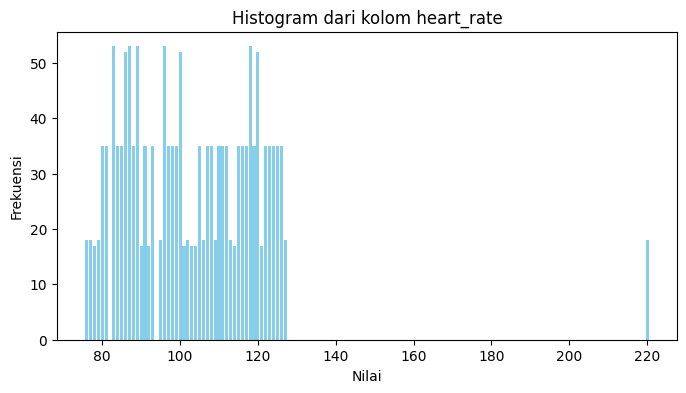

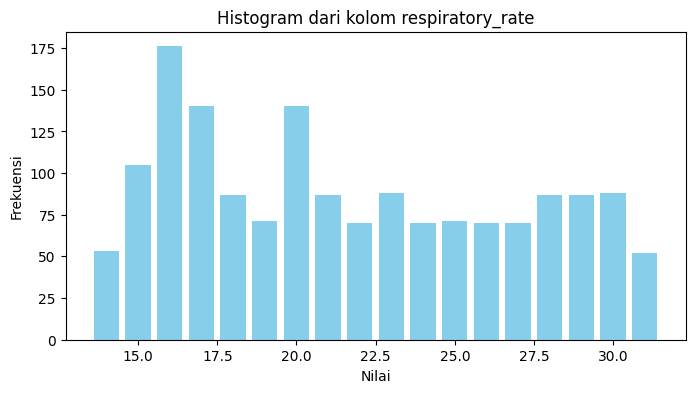

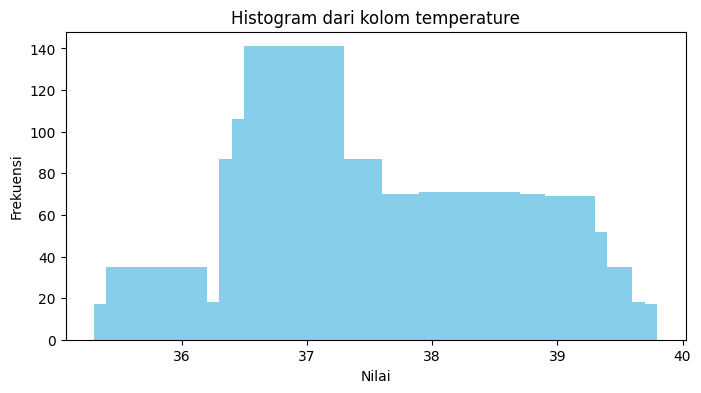

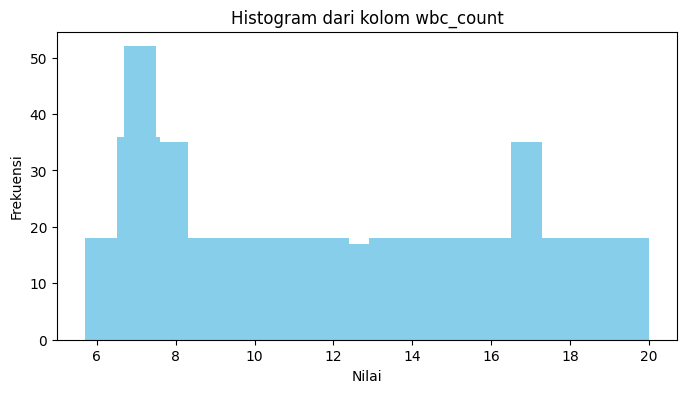

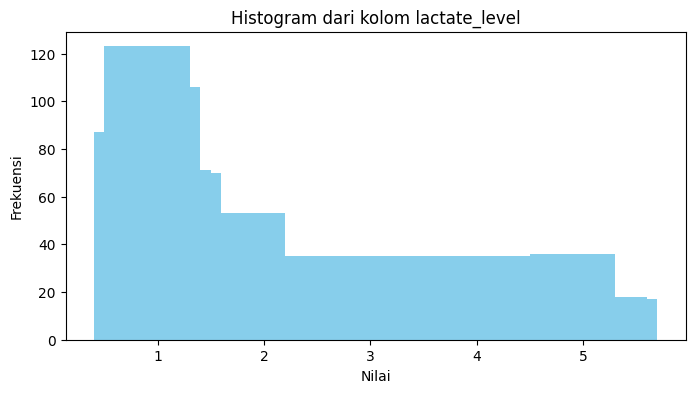

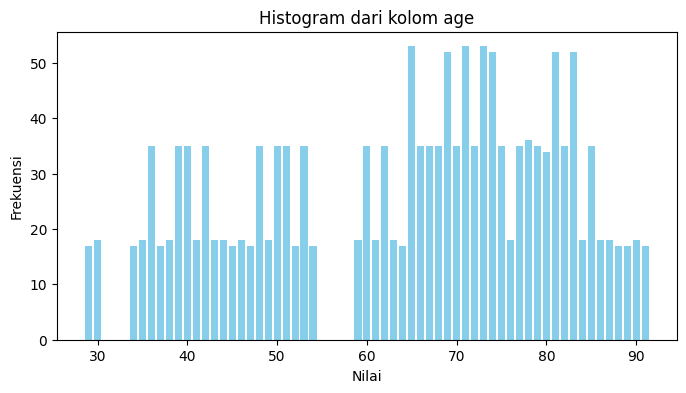

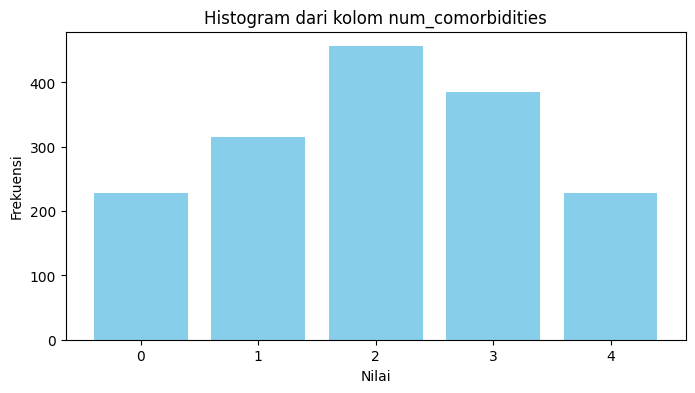

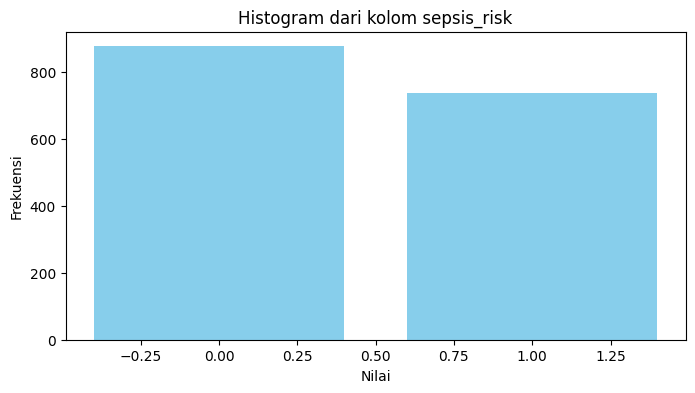

In [ ]:
# Loop melalui setiap kolom dalam DataFrame
for col in df.columns:
  # Menghitung frekuensi kemunculan setiap nilai unik dalam kolom
  value_counts = df[col].value_counts().sort_index()
  # Membuat figure dan axes untuk plot histogram
  plt.figure(figsize=(8, 4))
  # Membuat histogram menggunakan bar plot
  plt.bar(value_counts.index, value_counts.values, color='skyblue')
  # Menambahkan label sumbu x
  plt.xlabel('Nilai')
  # Menambahkan label sumbu y
  plt.ylabel('Frekuensi')
  # Menambahkan judul plot
  plt.title(f'Histogram dari kolom {col}')
  # Menampilkan plot
  plt.show()

Menghitung matriks korelasi antar kolom numerik dalam DataFrame menggunakan `.corr()` dan memvisualisasikannya sebagai heatmap menggunakan `seaborn.heatmap()`. Mask digunakan untuk menyembunyikan bagian atas matriks yang simetris. Heatmap ini membantu mengidentifikasi hubungan linear antar fitur dan antara fitur dengan target ('sepsis_risk').

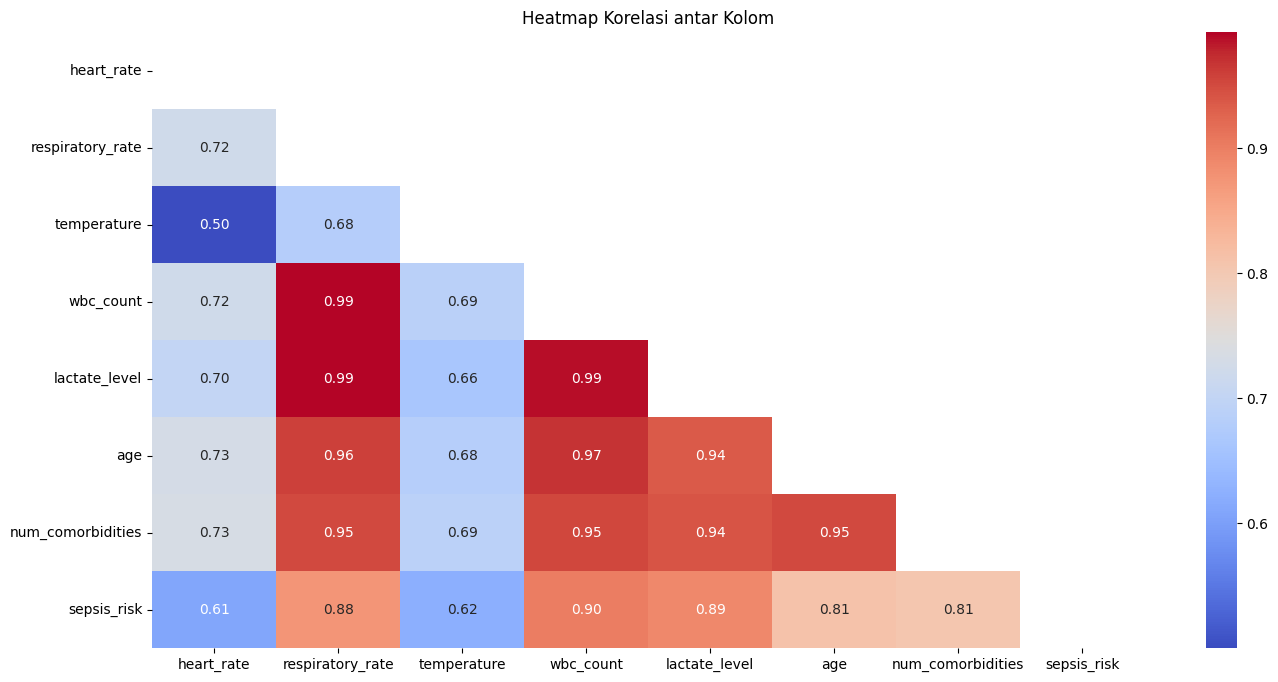

In [ ]:
# Menghitung matriks korelasi antar kolom
correlation = df.corr()
# Membuat mask untuk menyembunyikan bagian atas heatmap (karena simetris)
mask = np.triu(np.ones_like(correlation))

# Membuat figure dan axes untuk plot heatmap
fig = plt.figure(figsize=(16,8))
# Membuat heatmap korelasi
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
# Menambahkan judul plot
plt.title("Heatmap Korelasi antar Kolom")
# Menampilkan plot
plt.show()

Membuat salinan DataFrame dan kemudian "mengeluarkan" kolom 'sepsis_risk' (label target) dari salinan tersebut ke dalam variabel `label`. Salinan dibuat agar DataFrame asli (`df`) tetap utuh untuk pemisahan fitur dan target nantinya.

In [8]:
df_copy = df.copy()

label = df_copy.pop('sepsis_risk')

Membuat plot count untuk memvisualisasikan distribusi kelas dalam target label ('sepsis_risk') menggunakan `seaborn.countplot()`. Ini membantu melihat apakah dataset memiliki masalah ketidakseimbangan kelas (imbalance).

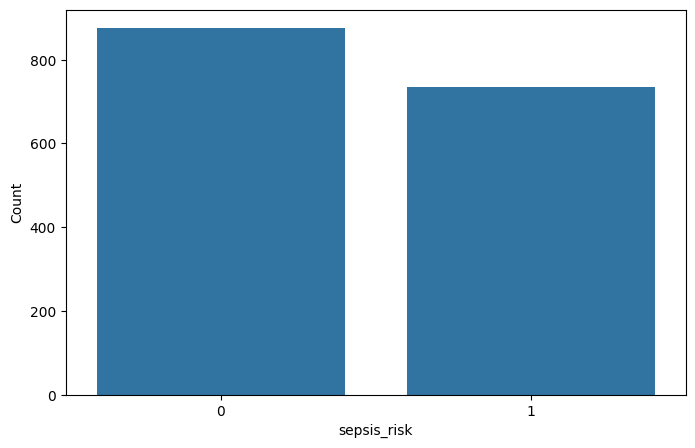

In [ ]:
# Membuat plot count dari target label
plt.figure(figsize=(8, 5))
sns.countplot(x=label, data=df)
plt.ylabel('Count')
plt.show()

Menghapus salinan DataFrame (`df_copy`) yang sudah tidak lagi dibutuhkan untuk menghemat memori.

In [9]:
# Menghapus DataFrame sementara
del df_copy

Memisahkan DataFrame asli (`df`) menjadi fitur (`x`) dengan menghapus kolom 'sepsis_risk' dan target (`y`) yang hanya berisi kolom 'sepsis_risk'. Langkah ini adalah persiapan standar sebelum melatih model supervised learning.

In [10]:
# Memisahkan fitur dan target
x = df.drop(columns='sepsis_risk')
y = df['sepsis_risk']

Membagi set fitur (`x`) dan target (`y`) menjadi subset pelatihan (training) dan pengujian (testing) menggunakan `train_test_split` dari scikit-learn. `test_size=0.2` berarti 20% data akan digunakan untuk pengujian, dan `random_state=42` memastikan pembagian yang konsisten.

In [11]:
# Membagi data menjadi set training dan testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Menggunakan SMOTE-NC (`Synthetic Minority Over-sampling Technique for Nominal and Continuous`) dari library `imblearn` untuk mengatasi ketidakseimbangan kelas pada data training. SMOTE-NC cocok untuk dataset yang memiliki campuran fitur numerik dan kategorikal. Indeks kolom yang dianggap kategorikal ditentukan, dan metode `fit_resample` diterapkan pada data training untuk menghasilkan set data yang seimbang.

In [12]:
from imblearn.over_sampling import SMOTENC

# Menentukan indeks kolom kategorikal untuk SMOTE-NC
categorical_features_indices = [0, 1, 5, 6]

# Menginisialisasi SMOTE-NC
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)

# Melakukan oversampling data training
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

Membuat plot count untuk memvisualisasikan distribusi kelas dalam target label setelah oversampling dengan SMOTE-NC. Tujuannya adalah untuk menunjukkan bahwa jumlah sampel di setiap kelas sekarang seimbang.

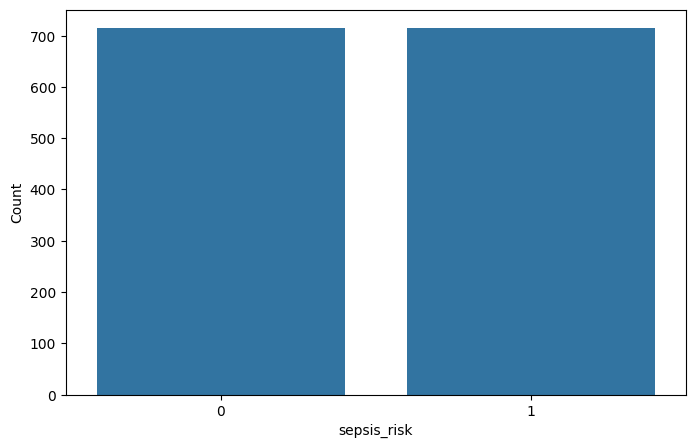

In [ ]:
# Visualisasi distribusi kelas setelah oversampling
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_resampled, data=X_train_resampled)
plt.ylabel('Count')
plt.show()

Menggunakan `MinMaxScaler` dari scikit-learn untuk melakukan penskalaan (scaling) pada fitur data. Scaling penting untuk banyak algoritma machine learning (terutama neural network) karena menyamakan rentang nilai fitur, mencegah fitur dengan rentang besar mendominasi. Data training di-fit dan transform, sementara data testing hanya di-transform menggunakan scaler yang sama.

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Menginisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan scaling pada data training dan testing
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print("Scaled Training Data (first 5 rows):")
display(pd.DataFrame(X_train_scaled, columns=X_train_resampled.columns).head())

print("\nScaled Testing Data (first 5 rows):")
display(pd.DataFrame(X_test_scaled, columns=X_test.columns).head())

Scaled Training Data (first 5 rows):


,heart_rate,respiratory_rate,temperature,wbc_count,lactate_level,age,num_comorbidities
0,0.159722,0.352941,0.540541,0.377778,0.244444,0.596774,0.50
1,0.347222,1.000000,1.000000,0.992593,1.000000,1.000000,1.00
2,0.256944,0.647059,0.756757,0.718519,0.577778,0.677419,0.75
3,0.222222,0.529412,0.729730,0.614815,0.444444,0.677419,0.50
4,0.083333,0.176471,0.351351,0.155556,0.066667,0.338710,0.25



Scaled Testing Data (first 5 rows):


,heart_rate,respiratory_rate,temperature,wbc_count,lactate_level,age,num_comorbidities
0,0.006944,0.000000,0.270270,0.014815,0.000000,0.096774,0.00
1,0.097222,0.176471,0.378378,0.177778,0.111111,0.354839,0.25
2,0.284722,0.705882,0.810811,0.770370,0.666667,0.854839,0.75
3,0.166667,0.411765,0.594595,0.422222,0.288889,0.612903,0.50
4,0.090278,0.117647,0.324324,0.140741,0.044444,0.258065,0.00


## Model training

Mengimpor kelas `XGBClassifier` dan menginisialisasikan model XGBoost dengan beberapa hyperparameter. XGBoost adalah algoritma gradient boosting yang populer dan sering memberikan performa tinggi.

In [14]:
from xgboost import XGBClassifier

# Menginisialisasi model XGBoost dengan parameter tertentu
xgb_model = XGBClassifier(n_estimators=100,
                      max_depth=6,
                      learning_rate=0.1,
                      random_state=42,
                      eval_metric='logloss')

Mendapatkan jumlah fitur (`num_features`) dan jumlah sampel (`num_values`) dari data training yang sudah di-scaled. Informasi ini mungkin berguna untuk konfigurasi model, terutama untuk lapisan input neural network.

In [15]:
# Mendapatkan jumlah fitur (kolom) dalam data yang di-scaled
num_features = len(X_train_scaled[0])
# Mendapatkan jumlah baris (sampel) dalam data yang di-scaled
num_values = len(X_train_scaled)

# Mencetak jumlah fitur dan jumlah sampel
print(num_features)
print(num_values)

7
1430


Mendefinisikan fungsi `create_ann_model` yang menerima dimensi input dan mengembalikan model Artificial Neural Network (ANN) Sequential sederhana. Model ini terdiri dari beberapa lapisan Dense dengan fungsi aktivasi ReLU dan lapisan output Sigmoid untuk klasifikasi biner. Model dikompilasi dengan optimizer Adam dan binary_crossentropy loss.

In [16]:
def create_ann_model(input_dim):
  """
  Membuat model Artificial Neural Network (ANN) sederhana.

  Parameters:
  -----------
  input_dim : int, dimensi input untuk lapisan pertama model.

  Returns:
  --------
  model : tf.keras.Sequential
      Model ANN yang telah dikompilasi.
  """
  # Membuat model Sequential ANN
  model = tf.keras.Sequential([
          # Menambahkan lapisan Dense pertama dengan aktivasi ReLU
          tf.keras.layers.Dense(64, input_shape=(input_dim,), activation='relu'),
          # Menambahkan lapisan Dense kedua dengan aktivasi ReLU
          tf.keras.layers.Dense(32, activation='relu'),
          # Menambahkan lapisan output Dense dengan aktivasi Sigmoid (untuk klasifikasi biner)
          tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  # Mengkompilasi model ANN
  model.compile(optimizer='adam', # Optimizer Adam
                loss='binary_crossentropy', # Loss function untuk klasifikasi biner
                metrics=['accuracy']) # Metrik evaluasi: Accuracy

  return model

Membuat instance model ANN menggunakan fungsi `create_ann_model` dengan jumlah fitur sebagai dimensi input. Kemudian, model summary ditampilkan untuk melihat struktur lapisan, jumlah parameter, dan bentuk output setiap lapisan.

In [17]:
# Membuat instance model ANN menggunakan fungsi create_ann_model
ann_model = create_ann_model(num_features)

# Menampilkan ringkasan struktur model ANN
ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

Mendefinisikan fungsi `ensemble_cv` untuk melakukan validasi silang KFold pada model ensemble sederhana. Fungsi ini melatih model XGBoost dan ANN di setiap fold, menggabungkan probabilitas prediksi mereka (soft voting), dan menghitung berbagai metrik evaluasi (Accuracy, Precision, Recall, F1-Score, AUC-ROC).

In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

def ensemble_cv(X, y, xgb_model, ann_model, resample_method=smote_nc, scaler=scaler, n_splits=5):
    """
    Melakukan validasi silang (cross-validation) untuk model ensemble sederhana
    menggunakan KFold. Model ensemble ini menggabungkan prediksi dari model
    XGBoost dan ANN (Artificial Neural Network) dengan metode soft voting.

    Parameters:
    -----------
    X : array-like or pandas DataFrame, data features. Akan dikonversi ke NumPy array.
    y : array-like or pandas Series, target labels. Akan dikonversi ke NumPy array.
    xgb_model : object, instance model XGBoost yang sudah dilatih.
    ann_model : object, instance model ANN yang sudah dilatih (atau belum,
                karena akan dilatih di setiap fold).
    resample_method : object, metode resampling dari imblearn (default=smote_nc).
    scaler : object, scaler dari scikit-learn (default=scaler).
    n_splits : int, jumlah fold untuk KFold cross-validation (default=5).

    Returns:
    --------
    results_df : DataFrame
        DataFrame yang berisi metrik evaluasi (Accuracy, Precision, Recall,
        F1-Score, AUC-ROC) untuk setiap fold.
    all_predictions : dict
        Dictionary yang berisi list dari true labels ('true'), predicted labels
        ('pred'), dan predicted probabilities ('proba') dari semua fold.
    """

    # Mengonversi X dan y menjadi array NumPy untuk memastikan pengindeksan berbasis posisi
    X_np = X.values if isinstance(X, pd.DataFrame) else X
    y_np = y.values if isinstance(y, pd.Series) else y

    # Inisialisasi KFold untuk membagi data
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # List untuk menyimpan hasil metrik per fold dan prediksi
    all_results = []
    all_predictions = {'true': [], 'pred': [], 'proba': []}

    print(f"\n{'='*70}")
    print(f"CROSS-VALIDATION DIMULAI ({n_splits} Folds)")
    print(f"{'='*70}\n")

    # Loop melalui setiap fold
    for fold_num, (train_idx, val_idx) in enumerate(kfold.split(X_np, y_np), 1):
        print(f"📊 Processing Fold {fold_num}/{n_splits}...")

        # Membagi data menjadi training dan validation set untuk fold saat ini
        # Menggunakan indeks berbasis posisi dari KFold split
        X_train, X_val = X_np[train_idx], X_np[val_idx]
        y_train, y_val = y_np[train_idx], y_np[val_idx]

        # Melakukan resampling pada data training fold saat ini
        X_train_sampled, y_train_sampled = resample_method.fit_resample(X_train, y_train)

        # Melakukan scaling pada data training dan validation fold saat ini
        X_train_scaled = scaler.fit_transform(X_train_sampled)
        X_val_scaled = scaler.transform(X_val)

        # Melatih model XGBoost pada data training fold saat ini
        xgb_model.fit(X_train_scaled, y_train_sampled)
        # Mendapatkan probabilitas prediksi dari XGBoost pada data validation
        xgb_proba = xgb_model.predict_proba(X_val_scaled)[:, 1]

        # Melatih model ANN pada data training fold saat ini
        # verbose=0 agar tidak menampilkan output training per epoch
        ann_model.fit(X_train_scaled, y_train_sampled, epochs=500, batch_size=64, verbose=0)
        # Mendapatkan probabilitas prediksi dari ANN pada data validation
        # Flatten output agar sesuai dengan format probabilitas XGBoost
        ann_proba = ann_model.predict(X_val_scaled, verbose=0).flatten()

        # Menggabungkan probabilitas prediksi dari kedua model (soft voting)
        ensemble_proba = (xgb_proba + ann_proba) / 2
        # Menghasilkan prediksi kelas berdasarkan threshold 0.5
        ensemble_pred = (ensemble_proba > 0.5).astype(int)

        # Menghitung metrik evaluasi untuk fold saat ini
        accuracy = accuracy_score(y_val, ensemble_pred)
        precision = precision_score(y_val, ensemble_pred, zero_division=0)
        recall = recall_score(y_val, ensemble_pred, zero_division=0)
        f1 = f1_score(y_val, ensemble_pred, zero_division=0)
        auc_roc = roc_auc_score(y_val, ensemble_proba)

        # Menyimpan hasil metrik fold saat ini
        all_results.append({
            'Fold': fold_num,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC-ROC': auc_roc
        })

        # Menyimpan true labels dan prediksi untuk agregasi keseluruhan
        all_predictions['true'].extend(y_val)
        all_predictions['pred'].extend(ensemble_pred)
        all_predictions['proba'].extend(ensemble_proba)

        print(f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score {f1:.4f} | AUC: {auc_roc:.4f}\n")

    # Mengubah hasil metrik menjadi DataFrame
    results_df = pd.DataFrame(all_results)

    return results_df, all_predictions

Mendefinisikan fungsi `print_summary` untuk mencetak ringkasan hasil validasi silang dalam format yang mudah dibaca. Fungsi ini menampilkan statistik (mean, std, min, max) untuk setiap metrik di seluruh fold dan juga metrik keseluruhan dengan menggabungkan semua prediksi dari semua fold.

In [22]:
def print_summary(results_df, all_predictions):
    """
    Mencetak ringkasan hasil validasi silang (cross-validation) dalam format
    yang mudah dibaca.

    Parameters:
    -----------
    results_df : DataFrame
        DataFrame yang berisi metrik evaluasi per fold, hasil dari
        simple_ensemble_cv().
    all_predictions : dict
        Dictionary yang berisi true labels dan prediksi dari semua fold,
        hasil dari simple_ensemble_cv().
    """

    print(f"\n{'='*70}")
    print("📊 RINGKASAN HASIL CROSS-VALIDATION")
    print(f"{'='*70}\n")

    print("Statistik per Metric:")
    print("-" * 70)
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

    # Mencetak statistik (mean, std, min, max) untuk setiap metrik
    for metric in metrics:
        mean_val = results_df[metric].mean()
        std_val = results_df[metric].std()
        min_val = results_df[metric].min()
        max_val = results_df[metric].max()

        print(f"{metric:12} : {mean_val:.4f} (± {std_val:.4f})  [Min: {min_val:.4f}, Max: {max_val:.4f}]")

    # Menggabungkan semua true labels dan prediksi dari semua fold
    y_true = np.array(all_predictions['true'])
    y_pred = np.array(all_predictions['pred'])
    y_proba = np.array(all_predictions['proba'])

    print(f"\n{'-'*70}")
    print("Overall Performance (Semua Fold Digabung):")
    print("-" * 70)
    # Mencetak metrik evaluasi keseluruhan
    print(f"Accuracy  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision : {precision_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"F1-Score  : {f1_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"AUC-ROC   : {roc_auc_score(y_true, y_proba):.4f}")

Memanggil fungsi `ensemble_cv` untuk menjalankan validasi silang 5-fold pada data training yang sudah di-scaled dan di-resample, menggunakan model XGBoost dan ANN yang sudah diinisialisasi. Hasil (DataFrame metrik per fold dan dictionary prediksi) disimpan dalam variabel `results_df` dan `predictions`.

In [25]:
results_df, predictions = ensemble_cv(
    x,
    y,
    xgb_model,
    ann_model,
    n_splits=5
)


CROSS-VALIDATION DIMULAI (5 Folds)

📊 Processing Fold 1/5...
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-Score 1.0000 | AUC: 1.0000

📊 Processing Fold 2/5...
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-Score 1.0000 | AUC: 1.0000

📊 Processing Fold 3/5...
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-Score 1.0000 | AUC: 1.0000

📊 Processing Fold 4/5...
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-Score 1.0000 | AUC: 1.0000

📊 Processing Fold 5/5...
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-Score 1.0000 | AUC: 1.0000



Memanggil fungsi `print_summary` untuk mencetak ringkasan hasil validasi silang yang disimpan dalam `results_df` dan `predictions`.

In [26]:
print_summary(results_df, predictions)


📊 RINGKASAN HASIL CROSS-VALIDATION

Statistik per Metric:
----------------------------------------------------------------------
Accuracy     : 1.0000 (± 0.0000)  [Min: 1.0000, Max: 1.0000]
Precision    : 1.0000 (± 0.0000)  [Min: 1.0000, Max: 1.0000]
Recall       : 1.0000 (± 0.0000)  [Min: 1.0000, Max: 1.0000]
F1-Score     : 1.0000 (± 0.0000)  [Min: 1.0000, Max: 1.0000]
AUC-ROC      : 1.0000 (± 0.0000)  [Min: 1.0000, Max: 1.0000]

----------------------------------------------------------------------
Overall Performance (Semua Fold Digabung):
----------------------------------------------------------------------
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-Score  : 1.0000
AUC-ROC   : 1.0000


Menginisialisasikan kembali model XGBoost dan melatihnya pada seluruh data training yang sudah di-scaled dan di-resample. Model ini akan digunakan untuk prediksi akhir pada data testing.

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100,
                      max_depth=6,
                      learning_rate=0.1,
                      random_state=42,
                      eval_metric='logloss')

xgb_model.fit(X_train_scaled, y_train_resampled)

print("Model training complete.")

Model training complete.


In [27]:
def plot_cm(y_true, y_pred, model_name):
  """
  Membuat dan menampilkan confusion matrix menggunakan seaborn dan matplotlib.

  Parameters:
  -----------
  y_true : array-like, true labels.
  y_pred : array-like, predicted labels.
  model_name : str, nama model untuk dicetak di judul plot.
  """
  # Menghitung confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  # Membuat figure dan axes untuk plot
  plt.figure(figsize=(8, 6))
  # Membuat heatmap dari confusion matrix
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['No Sepsis Risk', 'Sepsis Risk'], # Label untuk sumbu x
              yticklabels=['No Sepsis Risk', 'Sepsis Risk']) # Label untuk sumbu y
  # Menambahkan label sumbu
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  # Menambahkan judul plot
  plt.title(f'Confusion Matrix {model_name}')
  # Menampilkan plot
  plt.show()

Mendefinisikan callback `ModelCheckpoint` untuk model ANN. Checkpoint ini akan menyimpan model ANN dengan performa terbaik (berdasarkan 'val_loss' minimum) selama pelatihan.

In [ ]:
filepath = 'ann_model.keras'

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,
                    monitor="val_loss", mode="min",
                    save_best_only=True, verbose=1)

Melatih model ANN pada seluruh data training yang sudah di-scaled dan di-resample. Pelatihan dilakukan selama 500 epoch dengan batch size 64 dan menggunakan 10% data training untuk validasi. Callback checkpoint juga digunakan untuk menyimpan model terbaik.

In [ ]:
history = ann_model.fit(x=X_train_scaled,
          y=y_train_resampled,
          epochs=500,
          verbose=2,
          batch_size=64,
          validation_split=0.1,
          shuffle=True,
          callbacks=[checkpoint])

Epoch 1/500

Epoch 1: val_loss improved from inf to 0.00000, saving model to ann_model.keras
21/21 - 0s - 17ms/step - accuracy: 1.0000 - loss: 8.6061e-10 - val_accuracy: 1.0000 - val_loss: 2.1162e-09
Epoch 2/500

Epoch 2: val_loss improved from 0.00000 to 0.00000, saving model to ann_model.keras
21/21 - 0s - 7ms/step - accuracy: 1.0000 - loss: 8.4030e-10 - val_accuracy: 1.0000 - val_loss: 1.8547e-09
Epoch 3/500

Epoch 3: val_loss did not improve from 0.00000
21/21 - 0s - 7ms/step - accuracy: 1.0000 - loss: 8.0132e-10 - val_accuracy: 1.0000 - val_loss: 2.5070e-09
Epoch 4/500

Epoch 4: val_loss did not improve from 0.00000
21/21 - 0s - 6ms/step - accuracy: 1.0000 - loss: 8.1354e-10 - val_accuracy: 1.0000 - val_loss: 2.1224e-09
Epoch 5/500

Epoch 5: val_loss did not improve from 0.00000
21/21 - 0s - 6ms/step - accuracy: 1.0000 - loss: 8.7211e-10 - val_accuracy: 1.0000 - val_loss: 2.4154e-09
Epoch 6/500

Epoch 6: val_loss did not improve from 0.00000
21/21 - 0s - 6ms/step - accuracy: 1.000

## Model evaluation

Melakukan prediksi probabilitas pada data testing yang sudah di-scaled menggunakan model XGBoost (`xgb_model.predict`) dan model ANN (`ann_model.predict`). Output dari ANN di-flatten agar sesuai dengan format XGBoost.

In [ ]:
# Melakukan prediksi probabilitas pada data testing menggunakan model XGBoost
xgb_proba_test = xgb_model.predict(X_test_scaled)
# Melakukan prediksi probabilitas pada data testing menggunakan model ANN
ann_proba_test = ann_model.predict(X_test_scaled).flatten()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Menggabungkan probabilitas prediksi dari model XGBoost dan ANN menggunakan metode soft voting (rata-rata probabilitas). Kemudian, prediksi label biner dihasilkan dari probabilitas ensemble dan probabilitas model individu menggunakan threshold 0.5.

In [ ]:
# Menggabungkan probabilitas dari kedua model (soft voting)
ensemble_proba_test = (xgb_proba_test + ann_proba_test) / 2
# Menghasilkan prediksi kelas untuk ensemble berdasarkan threshold 0.5
ensemble_pred_test = (ensemble_proba_test >= 0.5).astype(int)

# Menghasilkan prediksi kelas untuk model individu berdasarkan threshold 0.5
xgb_pred_test = (xgb_proba_test > 0.5).astype(int)
ann_pred_test = (ann_proba_test >= 0.5).astype(int)

Mendefinisikan fungsi `plot_cm` untuk membuat dan menampilkan confusion matrix menggunakan `seaborn.heatmap` dan `matplotlib.pyplot`. Fungsi ini mengambil true labels, predicted labels, dan nama model sebagai input.

In [ ]:
def plot_cm(y_true, y_pred, model_name):
  """
  Membuat dan menampilkan confusion matrix menggunakan seaborn dan matplotlib.

  Parameters:
  -----------
  y_true : array-like, true labels.
  y_pred : array-like, predicted labels.
  model_name : str, nama model untuk dicetak di judul plot.
  """
  # Menghitung confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  # Membuat figure dan axes untuk plot
  plt.figure(figsize=(8, 6))
  # Membuat heatmap dari confusion matrix
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['No Sepsis Risk', 'Sepsis Risk'], # Label untuk sumbu x
              yticklabels=['No Sepsis Risk', 'Sepsis Risk']) # Label untuk sumbu y
  # Menambahkan label sumbu
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  # Menambahkan judul plot
  plt.title(f'Confusion Matrix {model_name}')
  # Menampilkan plot
  plt.show()

Memanggil fungsi `plot_cm` untuk membuat dan menampilkan confusion matrix untuk model XGBoost pada data testing.

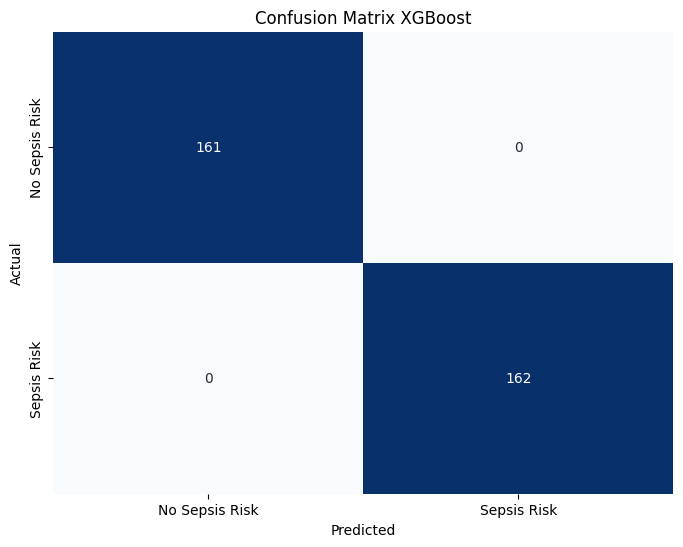

In [ ]:
# Memanggil fungsi plot_cm untuk menampilkan confusion matrix model XGBoost
plot_cm(y_test, xgb_pred_test, "XGBoost")

Memanggil fungsi `plot_cm` untuk membuat dan menampilkan confusion matrix untuk model Artificial Neural Network (ANN) pada data testing.

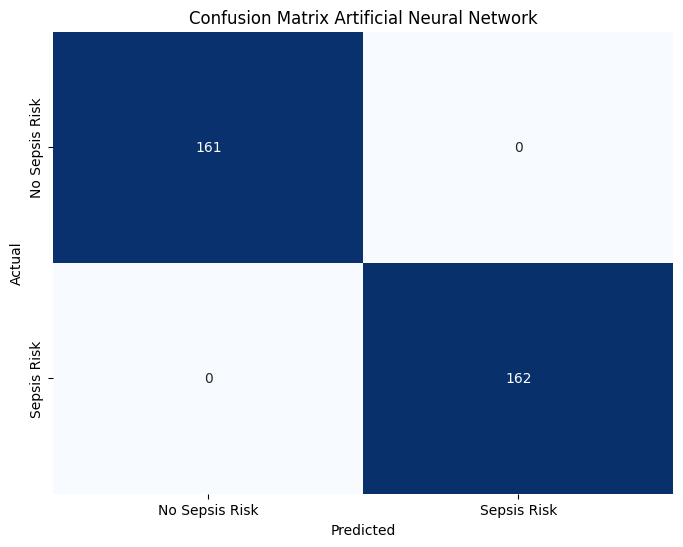

In [ ]:
plot_cm(y_test, ann_pred_test, "Artificial Neural Network")

Mencetak classification report untuk model XGBoost pada data testing menggunakan `sklearn.metrics.classification_report`. Report ini mencakup metrik Precision, Recall, F1-Score, dan Support untuk setiap kelas.

In [ ]:
print("\nClassification Report XGBoost:")
print(classification_report(y_test, xgb_pred_test))


Classification Report XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       162

    accuracy                           1.00       323
   macro avg       1.00      1.00      1.00       323
weighted avg       1.00      1.00      1.00       323



Mencetak classification report untuk model Artificial Neural Network (ANN) pada data testing menggunakan `sklearn.metrics.classification_report`. Report ini mencakup metrik Precision, Recall, F1-Score, dan Support untuk setiap kelas.

In [ ]:
print("\nClassification Report Artificial Neural Network:")
print(classification_report(y_test, ann_pred_test))


Classification Report Artificial Neural Network:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       162

    accuracy                           1.00       323
   macro avg       1.00      1.00      1.00       323
weighted avg       1.00      1.00      1.00       323



Mendefinisikan fungsi `evaluate_model` untuk mencetak metrik evaluasi dasar (Accuracy, Precision, Recall, F1-Score) untuk sebuah model.

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    """
    Mencetak metrik evaluasi dasar (Accuracy, Precision, Recall, F1-Score)
    untuk sebuah model.

    Parameters:
    -----------
    y_true : array-like, true labels.
    y_pred : array-like, predicted labels.
    model_name : str, nama model untuk dicetak di output.
    """
    print(f"\n--- {model_name} ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score:  {f1_score(y_true, y_pred):.4f}")

# Mengevaluasi performa ensemble model pada test set
evaluate_model(y_test, ensemble_pred_test, "Soft Voting Ensemble")


--- Soft Voting Ensemble ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


Menggunakan library `pickle` untuk menyimpan objek `MinMaxScaler` (scaler) dan model XGBoost yang sudah dilatih ke file (`scaler.pkl` dan `xgb_model.pkl`). Ini memungkinkan model dan scaler untuk digunakan kembali tanpa perlu melatihnya lagi. Model ANN disimpan dalam format `.keras` secara otomatis oleh ModelCheckpoint selama pelatihan.

In [ ]:
import pickle

# Menyimpan objek scaler (MinMaxScaler) ke file menggunakan pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Menyimpan model XGBoost yang sudah dilatih ke file menggunakan pickle
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

# Untuk model Keras/TensorFlow (ANN), disarankan menggunakan format .keras
# ann_model.save('ann_model.keras') # Ini sudah dilakukan sebelumnya dengan ModelCheckpoint